# Linear Regression: Theory and Math

This notebook consolidates the mathematical foundation of Linear Regression, inspired by the *Machine Learning Specialization* by Andrew Ng.  
It covers the intuition, formulas, derivations, gradient descent updates, and links to the corresponding implementation in NumPy.

## 1️⃣ Introduction & Intuition

Linear Regression is a fundamental supervised learning algorithm used to predict a continuous target variable from one or more input features.

- When there is **only one input feature**, it is called **Single Linear Regression**.  
  *Example:* Predicting house price based only on square footage.

- When there are **multiple input features**, it is called **Multiple Linear Regression**.  
  *Example:* Predicting house price based on square footage, number of bedrooms, and location.


**More Examples**
- Estimating house prices  
- Forecasting sales revenue from marketing spend across different channels  
- Predicting stock returns from multiple financial indicators

---
Linear regression fits a line (or a hyperplane in multiple dimensions) that best captures the relationship between features and the target variable. The goal is to minimize the difference between predicted and actual values.


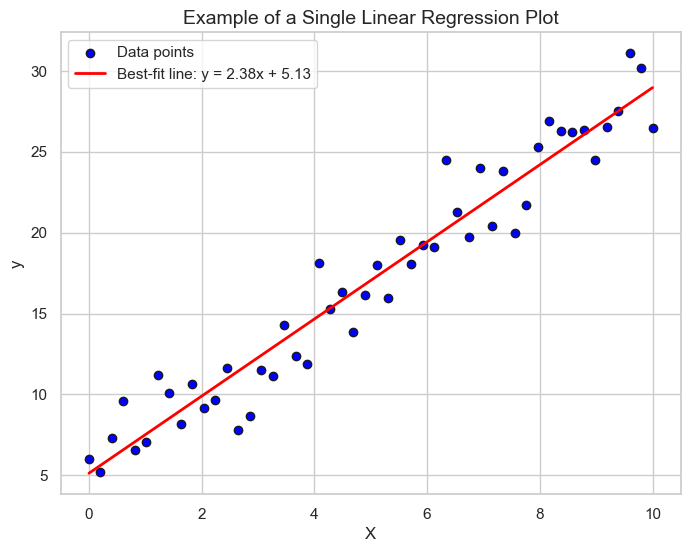

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for professional look
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 50)                   # Feature
noise = np.random.normal(0, 2, X.shape)      # Random noise
y = 2.5 * X + 5 + noise                      # Linear relationship: y = 2.5x + 5 + noise

# Compute best-fit line using NumPy (least squares)
coeffs = np.polyfit(X, y, 1)                 # [slope, intercept]
y_pred = np.polyval(coeffs, X)

# Plot scatter and best-fit line
plt.scatter(X, y, color='blue', label='Data points', edgecolor='k')
plt.plot(X, y_pred, color='red', linewidth=2,
         label=f'Best-fit line: y = {coeffs[0]:.2f}x + {coeffs[1]:.2f}')
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Example of a Single Linear Regression Plot', fontsize=14)
plt.legend()

# Save figure as PNG
plt.savefig("single_linear_regression_plot.png", dpi=300, bbox_inches='tight')

# (Optional) show plot in interactive sessions
# plt.show()


##### To load the image when uploaded onto GitHub repository
![Single Linear Regression Plot](images/single_linear_regression_plot.png)

## 2️⃣ Model Formula  

The linear regression model predicts output as a weighted sum of the input features plus a bias.  

1) **Single Linear Regression (one feature):**  
  $$
  f_{w,b}(x^{(i)}) = w x^{(i)} + b
  $$  
  • $w$: slope (weight)  
  • $b$: intercept (bias)  
  • $x^{(i)}$: input feature for sample $i$  

2) **Multiple Linear Regression (multiple features):**  
  $$
  f_{\mathbf{w},b}(x^{(i)}) = w_1 x_1^{(i)} + w_2 x_2^{(i)} + \dots + w_n x_n^{(i)} + b
  $$  
  or, in vector form:  
  $$
  f_{\mathbf{w},b}(x^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b
  $$  
  • $\mathbf{w} = (w_1, w_2, \dots, w_n)$: weight vector (slopes) <br>
• $n$: number of features <br>
  • $\mathbf{x}^{(i)} = (x_1^{(i)}, x_2^{(i)}, \dots, x_n^{(i)})$: feature vector for sample $i$  
  • $b$: intercept (bias)

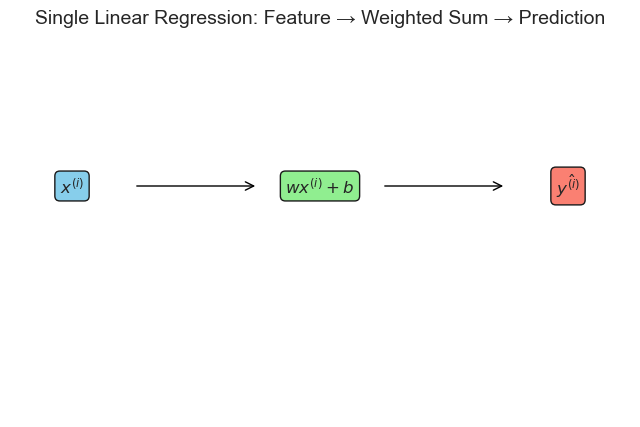

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

# Set up figure
fig, ax = plt.subplots(figsize=(8,5))
ax.set_xlim(0, 10)
ax.set_ylim(0, 5)
ax.axis('off')  # Hide axes

# Single feature node
ax.text(1, 3, r'$x^{(i)}$', fontsize=12, ha='center', va='center',
        bbox=dict(facecolor='skyblue', edgecolor='k', boxstyle='round,pad=0.3'))

# Weighted sum node
ax.text(5, 3, r'$wx^{(i)} + b$', fontsize=12, ha='center', va='center',
        bbox=dict(facecolor='lightgreen', edgecolor='k', boxstyle='round,pad=0.3'))

# Prediction node
ax.text(9, 3, r'$\hat{y^{(i)}}$', fontsize=12, ha='center', va='center',
        bbox=dict(facecolor='salmon', edgecolor='k', boxstyle='round,pad=0.3'))

# Arrow from feature to weighted sum
arrow = FancyArrowPatch((2, 3), (4, 3), arrowstyle='->', mutation_scale=15, color='black')
ax.add_patch(arrow)

# Arrow from weighted sum to prediction
arrow = FancyArrowPatch((6, 3), (8, 3), arrowstyle='->', mutation_scale=15, color='black')
ax.add_patch(arrow)

# Title
plt.title("Single Linear Regression: Feature → Weighted Sum → Prediction", fontsize=14)

# Save figure as an image
plt.savefig("single_linear_regression.png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()


##### To load the image when uploaded onto GitHub repository
![Single Linear Regression](images/single_linear_regression.png)

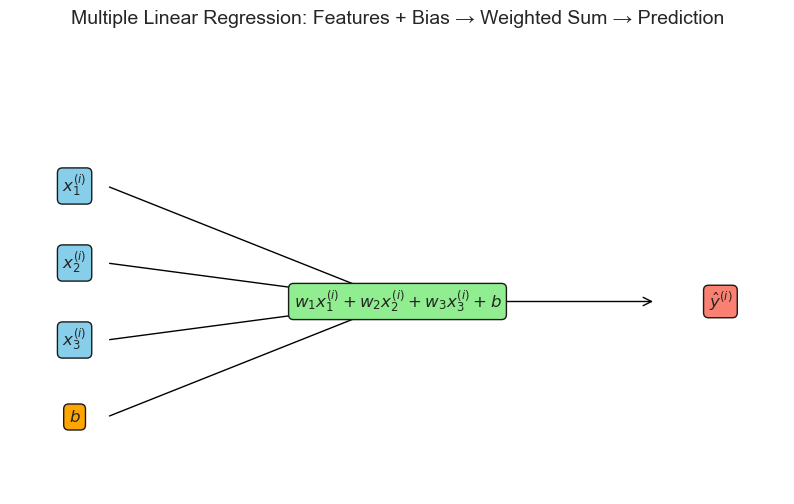

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

# Set up figure
fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlim(0, 12)
ax.set_ylim(0, 6)
ax.axis('off')  # Hide axes

# Feature and bias nodes
nodes = [r'$x_1^{(i)}$', r'$x_2^{(i)}$', r'$x_3^{(i)}$', r'$b$']
y_positions = [4, 3, 2, 1]  # evenly spaced on left
x_pos = 1  # x-coordinate for all nodes

for node, y in zip(nodes, y_positions):
    color = 'orange' if node == r'$b$' else 'skyblue'
    ax.text(x_pos, y, node, fontsize=12, ha='center', va='center',
            bbox=dict(facecolor=color, edgecolor='k', boxstyle='round,pad=0.3'))

# Weighted sum node centered relative to inputs
weighted_sum_y = sum(y_positions)/len(y_positions)  # middle y
ax.text(6, weighted_sum_y, r'$w_1 x_1^{(i)} + w_2 x_2^{(i)} + w_3 x_3^{(i)} + b$', 
        fontsize=12, ha='center', va='center',
        bbox=dict(facecolor='lightgreen', edgecolor='k', boxstyle='round,pad=0.3'))

# Prediction node
ax.text(11, weighted_sum_y, r'$\hat{y}^{(i)}$', fontsize=12, ha='center', va='center',
        bbox=dict(facecolor='salmon', edgecolor='k', boxstyle='round,pad=0.3'))

# Arrows from features/bias to weighted sum
for y in y_positions:
    arrow = FancyArrowPatch((x_pos+0.5, y), (6, weighted_sum_y), arrowstyle='->', mutation_scale=15, color='black')
    ax.add_patch(arrow)

# Arrow from weighted sum to prediction
arrow = FancyArrowPatch((7, weighted_sum_y), (10, weighted_sum_y), arrowstyle='->', mutation_scale=15, color='black')
ax.add_patch(arrow)

# Title
plt.title("Multiple Linear Regression: Features + Bias → Weighted Sum → Prediction", fontsize=14)

# Save figure
plt.savefig("multiple_linear_regression.png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()


##### To load the image when uploaded onto GitHub repository
![Multiple Linear Regression](images/_linear_regression.png)

## 3️⃣ Cost Function

The cost function measures how far the model predictions are from the actual data. It is used to guide the optimization of the model parameters.

1. **Single Linear Regression**

For a single feature $x^{(i)}$, the cost function is:

$$
J(w,b) = \frac{1}{2m} \sum_{i=0}^{m-1} \left(f_{w,b}(x^{(i)}) - y^{(i)}\right)^2, \quad \text{where} \quad \hat{y}^{(i)} = f_{w,b}(x^{(i)}) = w x^{(i)} + b
$$

- $m$ is the number of training examples.  
- The factor $\frac{1}{2}$ simplifies derivatives during gradient descent.  
- Goal: Minimize $J(w,b)$ by adjusting $w$ (slope) and $b$ (bias).  

2. **Multiple Linear Regression**

For multiple features $\mathbf{x}^{(i)} = [x_1^{(i)}, x_2^{(i)}, ..., x_n^{(i)}]$, the cost function generalizes to:

$$
J(\mathbf{w},b) = \frac{1}{2m} \sum_{i=0}^{m-1} \left(f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}\right)^2, \quad \text{where} \quad \hat{y}^{(i)} = f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = w_1 x_1^{(i)} + w_2 x_2^{(i)} + \dots + w_n x_n^{(i)} + b
$$

- $n$ is the number of features.
- $\mathbf{w} = [w_1, w_2, ..., w_n]$ are the weights for each feature.  
- Goal: Minimize $J(\mathbf{w},b)$** by adjusting weights $w_j$ and bias $b$.  

## 4️⃣ Gradient Descent Derivation

Gradient descent is the optimization method used to minimize the cost function $J$. It updates the model parameters iteratively in the direction that reduces the cost.

1. **Single Linear Regression**

For a single feature $x^{(i)}$, the parameters are updated as:

$$
w := w - \alpha \frac{\partial J}{\partial w}, \quad
b := b - \alpha \frac{\partial J}{\partial b}
$$

$$
\frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} \big( (w x^{(i)} + b) - y^{(i)} \big) x^{(i)}
$$

$$
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} \big( (w x^{(i)} + b) - y^{(i)} \big)
$$

- $\alpha$ is the **learning rate** (step size).  
- Goal: Iteratively move all parameters toward the minimum of $J(w,b)$.

2. **Multiple Linear Regression**

For multiple features $\mathbf{x}^{(i)} = [x_1^{(i)}, x_2^{(i)}, ..., x_n^{(i)}]$, the weights vector $\mathbf{w} = [w_1, w_2, ..., w_n]$ and bias $b$ are updated as:

$$
w_j := w_j - \alpha \frac{\partial J}{\partial w_j}, \quad \text{for } j = 1,2,...,n
$$

$$
b := b - \alpha \frac{\partial J}{\partial b}
$$

- Each weight $w_j$ is adjusted according to its partial derivative of the cost.  
- The bias $b$ is updated similarly.  
- Goal: Iteratively move all parameters toward the minimum of $J(\mathbf{w},b)$.

> Note:
> $:=$ means to *update* the value on the **left** with the value on the **right**.

>**Note on Visualization Choice**
>
>In the following 2 plots, gradient descent is demonstrated without using a bias term (b). The intent behind this simplification is purely to enhance visualization and intuition: by removing b, the cost function becomes a one-dimensional curve in terms of w only. This allows the gradient descent path to lie exactly on the cost curve, making it easier to see how each update moves “downhill” toward the minimum.

>It is important to highlight that in a full linear regression model, both w and b would be updated simultaneously. The 2D visualization here does not capture the interplay between slope and intercept; it is a deliberate simplification to illustrate the basic mechanism of gradient descent in a clear and intuitive way.

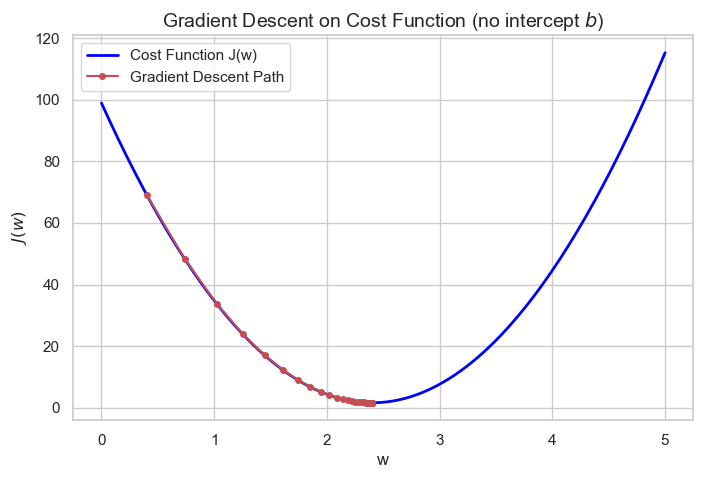

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data without intercept
np.random.seed(42)
X = np.linspace(0, 10, 50)
y = 2.5 * X + np.random.normal(0, 2, X.shape)  # y = 2.5*x + noise
m = len(y)

# Gradient descent settings (only w)
w = 0.0        # initial guess
alpha = 0.005   # learning rate
iterations = 50

# Store path
path_w, path_J = [], []

for _ in range(iterations):
    # compute gradient
    y_pred = w * X
    dw = (1/m) * np.sum((y_pred - y) * X)
    
    # update w
    w -= alpha * dw
    
    # compute cost using updated w
    y_pred_updated = w * X
    cost = (1/(2*m)) * np.sum((y_pred_updated - y)**2)
    
    # store path
    path_w.append(w)
    path_J.append(cost)

# Prepare range of w values for cost curve
w_vals = np.linspace(0, 5, 200)
J_vals = [(1/(2*m)) * np.sum((w_val*X - y)**2) for w_val in w_vals]

# Plot 2D cost vs w
plt.figure(figsize=(8,5))
plt.plot(w_vals, J_vals, label='Cost Function J(w)', color='blue', linewidth=2)
plt.plot(path_w, path_J, 'ro-', label='Gradient Descent Path', markersize=4)
plt.xlabel('w', fontsize=12)
plt.ylabel(r'$J(w)$', fontsize=12)
plt.title(r'Gradient Descent on Cost Function (no intercept $b$)', fontsize=14)
plt.legend()
plt.grid(True)

# Save the image
plt.savefig('grad_desc_good_lr.png', dpi=300, bbox_inches='tight')
plt.show()


##### To load the image when uploaded onto GitHub repository
![Gradient Descent Good Learning Rate](images/grad_desc_good_lr.png)

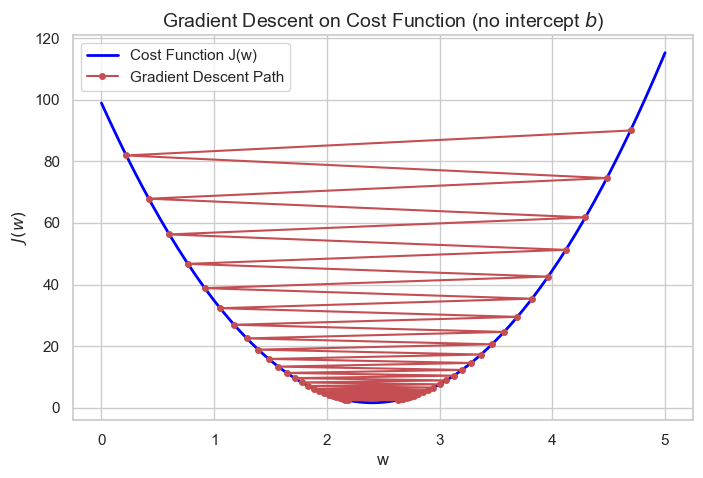

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data without intercept
np.random.seed(42)
X = np.linspace(0, 10, 50)
y = 2.5 * X + np.random.normal(0, 2, X.shape)  # y = 2.5*x + noise
m = len(y)

# Gradient descent settings (only w)
w = 0.0        # initial guess
alpha = 0.058   # learning rate
iterations = 50

# Store path
path_w, path_J = [], []

for _ in range(iterations):
    # compute gradient
    y_pred = w * X
    dw = (1/m) * np.sum((y_pred - y) * X)
    
    # update w
    w -= alpha * dw
    
    # compute cost using updated w
    y_pred_updated = w * X
    cost = (1/(2*m)) * np.sum((y_pred_updated - y)**2)
    
    # store path
    path_w.append(w)
    path_J.append(cost)

# Prepare range of w values for cost curve
w_vals = np.linspace(0, 5, 200)
J_vals = [(1/(2*m)) * np.sum((w_val*X - y)**2) for w_val in w_vals]

# Plot 2D cost vs w
plt.figure(figsize=(8,5))
plt.plot(w_vals, J_vals, label='Cost Function J(w)', color='blue', linewidth=2)
plt.plot(path_w, path_J, 'ro-', label='Gradient Descent Path', markersize=4)
plt.xlabel('w', fontsize=12)
plt.ylabel(r'$J(w)$', fontsize=12)
plt.title(r'Gradient Descent on Cost Function (no intercept $b$)', fontsize=14)
plt.legend()
plt.grid(True)

# Save the image
plt.savefig('grad_desc_bad_lr.png', dpi=300, bbox_inches='tight')
plt.show()


##### To load the image when uploaded onto GitHub repository
![Gradient Descent Bad Learning Rate](images/grad_desc_bad_lr.png)

## 5️⃣ Vectorized Form

Linear regression can be expressed in **matrix/vector form** for computational efficiency.

1. **Single Linear Regression**

For a single feature, the model can be written as:

$$
\mathbf{\hat{y}} = X \theta
$$
 
- $X$ is an $m \times 2$ matrix, with the first column containing the feature $x^{(i)}$, and the second column contains 1's for the bias
 
\begin{bmatrix}
x^{(0)} & 1 \\
x^{(1)} & 1 \\
\vdots & \vdots \\
x^{(m-1)} & 1
\end{bmatrix}

- $\theta = \begin{bmatrix} w \\ b \end{bmatrix}$  
- $\mathbf{\hat{y}}$ is the vector of predictions  
- Gradient descent update:  
$$
\theta := \theta - \frac{\alpha}{m} X^T (X \theta - y)
$$

2. **Multiple Linear Regression**

For multiple features $\mathbf{x}^{(i)} = [x_1^{(i)}, x_2^{(i)}, ..., x_n^{(i)}]$, the vectorized form generalizes naturally:

$$
\mathbf{\hat{y}} = X \mathbf{\theta}, \quad 
\mathbf{\theta} := \mathbf{\theta} - \frac{\alpha}{m} X^T (X \mathbf{\theta} - \mathbf{y})
$$

- $X$ is an $m \times (n+1)$ matrix, with the first $n$ columns containing features $x_1^{(i)}, ..., x_n^{(i)}$, and the last column is 1's for the bias

\begin{bmatrix}
x_1^{(0)} & x_2^{(0)} & \dots & x_n^{(0)} & 1 \\
x_1^{(1)} & x_2^{(1)} & \dots & x_n^{(1)} & 1 \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
x_1^{(m-1)} & x_2^{(m-1)} & \dots & x_n^{(m-1)} & 1
\end{bmatrix}

- $\mathbf{\theta} = \begin{bmatrix}
w_1 \\
w_2 \\
\vdots \\
w_n \\
b
\end{bmatrix}
$  
- $\mathbf{\hat{y}}$ is the $m \times 1$ vector of predictions

---

Why vectorization is useful:
  - Eliminates explicit loops over training examples and features.  
  - Leverages **broadcasting** in libraries like NumPy, automatically applying operations (like adding a bias) across all elements or rows.  
  - Particularly beneficial for **multiple linear regression**, where the number of features $n$ is large.  
  - Reduces computational overhead and speeds up gradient descent updates.

## 6️⃣ Additional Concepts

**Overfitting & Underfitting**

Using too many features relative to the number of data points can lead to overfitting, while using too few features may lead to underfitting. 

  - **Underfitting**: the model is too simple, and the cost function remains high even at the optimal parameters.  
  - **Overfitting**: the model fits the training data very well, so the cost is extremely low for the training set, but it may generalize poorly.  

---

**Regularization (Ridge / Lasso)** 

- Adds a penalty term to the cost function to reduce overfitting
  
1. **Ridge (L2)** — coefficient shrinkage
   
    $$
    J_{ridge}(\mathbf{w}, b) = \frac{1}{2m} \sum_{i=1}^{m} (\sum_{j=1}^{n} w_j x_j^{(i)} + b - y^{(i)})^2 + \lambda \sum_{j=1}^{n} w_j^2
    $$

Gradient w.r.t $w_j$  
    $$
    \frac{\partial J_\text{ridge}}{\partial w_j} = \frac{1}{m} \sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)}) x_j^{(i)} + 2\lambda w_j
    $$

*The L2 penalty term $2\lambda w_j$ is proportional to the coefficient itself, so large coefficients shrink faster, small ones shrink slower. Coefficients rarely become exactly zero.*

2. **Lasso (L1)** — feature selection
 
    $$
    J_{lasso}(\mathbf{w}, b) = \frac{1}{2m} \sum_{i=1}^{m} \Big(\sum_{j=1}^{n} w_j x_j^{(i)} + b - y^{(i)}\Big)^2 + \lambda \sum_{j=1}^{n} |w_j|
    $$

Gradient w.r.t $w_j$
    $$
\frac{\partial J_\text{lasso}}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)}) x_j^{(i)} + \lambda \, \text{sign}(w_j)
    $$

*The L1 penalty term $\lambda\,\text{sign}(w_j)$ is constant in magnitude regardless of $w_j$, which can push small coefficients exactly to zero, enabling feature selection.*

## 7️⃣ Implementation

See the corresponding **NumPy-based implementation** here:  [linear_regression_numpy.ipynb](../implementation/linear_regression_numpy.ipynb)